## Importing libs

In [1]:
# create fake datasets
from sklearn.datasets import make_moons

# ML lib for GNG model
from neupy.algorithms import GrowingNeuralGas

import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
%matplotlib inline

/home/rafaelpereira/anaconda3/envs/neupy/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rafaelpereira/anaconda3/envs/neupy/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rafaelpereira/anaconda3/envs/neupy/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rafaelpereira/anaconda

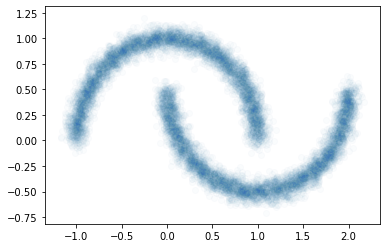

In [5]:
data, _ = make_moons(10000, noise=0.06, random_state=0)
plt.scatter(*data.T, alpha=0.02)

/home/rafaelpereira/anaconda3/envs/neupy/lib/python3.7/site-packages/ipykernel_launcher.py:49: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


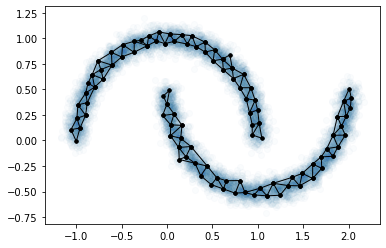

In [6]:
gng = GrowingNeuralGas(
    n_inputs=2,
    n_start_nodes=2,

    shuffle_data=True,
    verbose=False,
    
    step=0.1,
    neighbour_step=0.001,
    
    max_edge_age=50,
    max_nodes=100,
    
    n_iter_before_neuron_added=100,
    after_split_error_decay_rate=0.5,
    error_decay_rate=0.995,
    min_distance_for_update=0.2,
)

fig = plt.figure()
plt.scatter(*data.T, alpha=0.02)

def animate(i):
    for line in animate.prev_lines:
        line.remove()
        
    # Training will slow down overtime and we increase number
    # of data samples for training
    n = int(0.5 * gng.n_iter_before_neuron_added * (1 + i // 100))
    
    sampled_data_ids = np.random.choice(len(data), n)
    sampled_data = data[sampled_data_ids, :]
    gng.train(sampled_data, epochs=1)
    
    lines = []
    for node_1, node_2 in gng.graph.edges:
        weights = np.concatenate([node_1.weight, node_2.weight])
        line, = plt.plot(*weights.T, color='black')

        plt.setp(line, linewidth=1, color='black')
        
        lines.append(line)
        lines.append(plt.scatter(*weights.T, color='black', s=10))
    
    animate.prev_lines = lines
    return lines

animate.prev_lines = []
anim = animation.FuncAnimation(fig, animate, tqdm(np.arange(220)), interval=30, blit=True)
HTML(anim.to_html5_video())